Tomando como base el conjunto de datos en anexo, construir un clasificador que permita predecir la deserción de estudiantes. Considerar las siguientes restricciones:

Usar como base, el pipeline mostrado para desarrollar un proyecto de Machine Learning.
Realizar un análisis comparativo de por lo menos 4 clasificadores (pueden ser utilizados modelos de Sci-kit learn u otras librerías de Python).
De manera obligatoria debe ser utilizada una implementación propia del algoritmo de regresión logística.
El análisis comparativo debe ser realizado utilizando Cross validation y pruebas de significancia estadística.
Debe realizarse un proceso de afinamiento sobre el mejor modelo. Reportar sobre el conjunto de prueba con la métrica pertinente.
Se debe enviar un Jupyter Notebook, con todas las etapas del proceso llevado a cabo.

In [ ]:
import numpy as np
np.random.seed(123)

import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [ ]:
#GET THE DATA
import pandas as pd
data = pd.read_csv("/content/datos_desercion.csv")
data.head()

,cant_semestres,sexo,prom_notas_semestre,prom_inasistencias,cursos_reprobados,desercion
0,0,F,9.332000,8.800000,3,0
1,0,F,11.606000,14.600000,1,0
2,0,M,15.052500,11.375000,0,0
3,0,M,9.261666,17.666666,4,0
4,0,M,12.985000,8.666667,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cant_semestres       4500 non-null   int64  
 1   sexo                 4500 non-null   object 
 2   prom_notas_semestre  4500 non-null   float64
 3   prom_inasistencias   4500 non-null   float64
 4   cursos_reprobados    4500 non-null   int64  
 5   desercion            4500 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 211.1+ KB


In [ ]:
data[data["sexo"]=="M"]["desercion"].value_counts()
data[data["sexo"]=="F"]["desercion"].value_counts()[1]/np.sum(data[data["sexo"]=="F"]["desercion"].value_counts())
#3.72% de mujeres desertaron
#4.32% de hombres desertaron

0.037295081967213116

In [ ]:
data.describe()

,cant_semestres,prom_notas_semestre,prom_inasistencias,cursos_reprobados,desercion
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.069778,12.874364,9.654359,1.192000,0.040000
std,0.475702,2.023901,6.088824,1.272943,0.195981
min,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.000000,11.878429,5.166667,0.000000,0.000000
50%,0.000000,13.060000,9.000000,1.000000,0.000000
75%,0.000000,14.174881,13.285714,2.000000,0.000000
max,5.000000,18.372858,53.000000,8.000000,1.000000


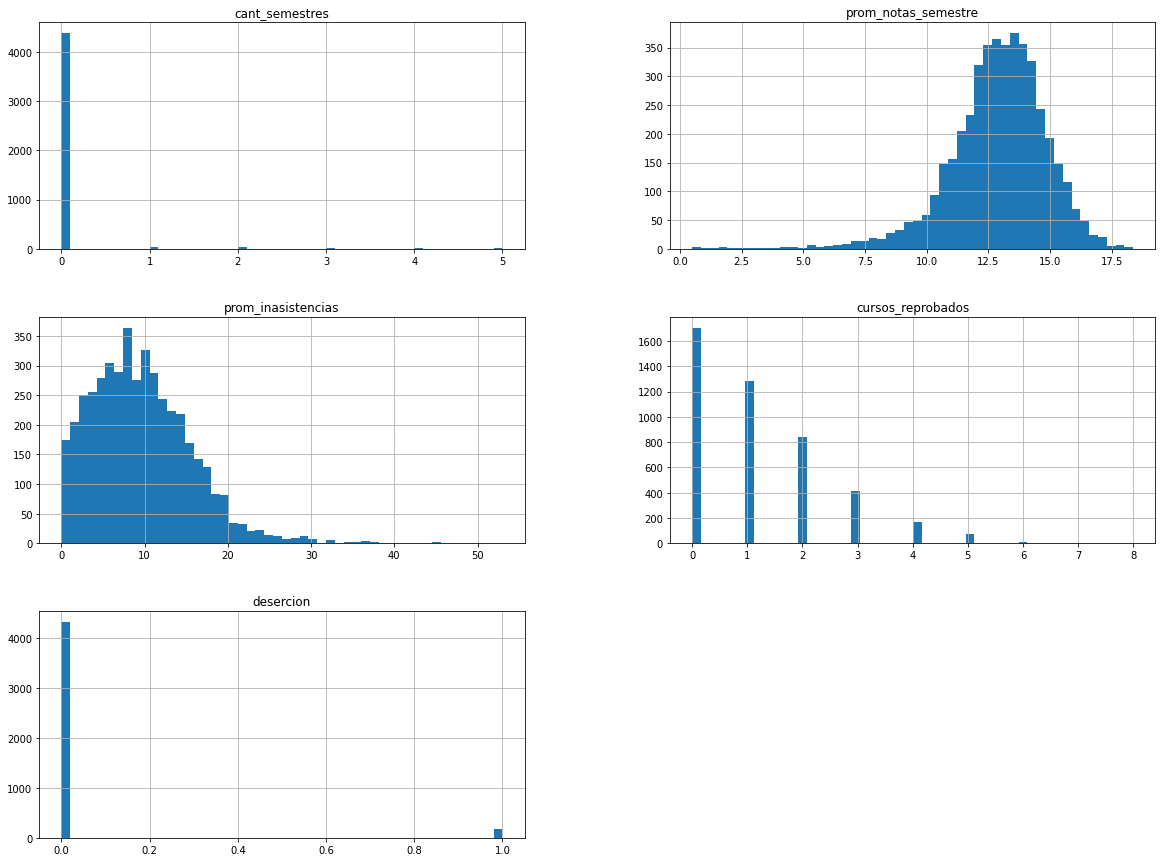

In [ ]:
desertores = data[data["desercion"] == 1]
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#dividir en test train
#pocos desertores, estratificar
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["desercion"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [ ]:
strat_test_set["desercion"].value_counts() / len(strat_test_set)

0    0.96
1    0.04
Name: desercion, dtype: float64

In [ ]:
data["desercion"].value_counts() / len(data)

0    0.96
1    0.04
Name: desercion, dtype: float64

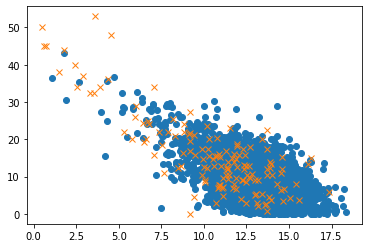

In [ ]:
#DISCOVER AND VISUALIZE DATA TO GAIN INSIGHTS
#strat_train_set.plot(kind="scatter", x="prom_notas_semestre", y="prom_inasistencias")
plt.plot(strat_train_set[strat_train_set["desercion"]==0]["prom_notas_semestre"], strat_train_set[strat_train_set["desercion"]==0]["prom_inasistencias"], 'o')
plt.plot(strat_train_set[strat_train_set["desercion"]==1]["prom_notas_semestre"], strat_train_set[strat_train_set["desercion"]==1]["prom_inasistencias"], 'x')
plt.show()


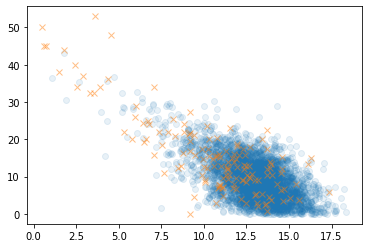

In [ ]:
plt.plot(strat_train_set[strat_train_set["desercion"]==0]["prom_notas_semestre"], strat_train_set[strat_train_set["desercion"]==0]["prom_inasistencias"], 'o', alpha = 0.1)
plt.plot(strat_train_set[strat_train_set["desercion"]==1]["prom_notas_semestre"], strat_train_set[strat_train_set["desercion"]==1]["prom_inasistencias"], 'x', alpha = 0.5)
plt.show()


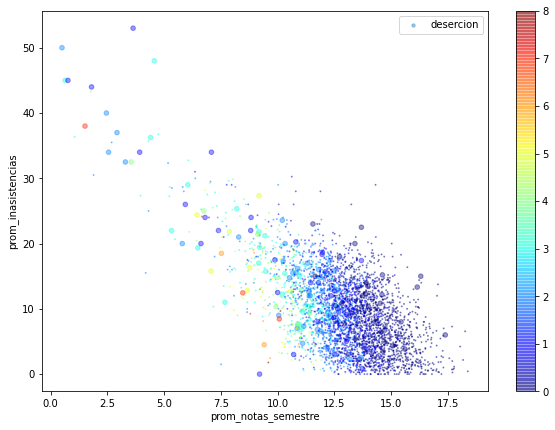

In [ ]:
strat_train_set.plot(kind="scatter", x="prom_notas_semestre", y="prom_inasistencias", alpha=0.4,
    s=(strat_train_set["desercion"]*20)+1, label="desercion", figsize=(10,7),
    c=strat_train_set["cursos_reprobados"], cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f833b7b9a50>,
      dtype=object)

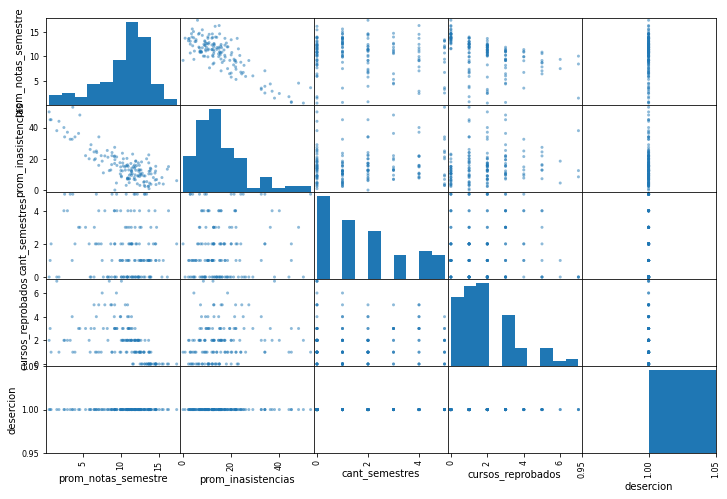

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["prom_notas_semestre", "prom_inasistencias", "cant_semestres", "cursos_reprobados",
              "desercion"]
scatter_matrix(strat_train_set[strat_train_set["desercion"]==1][attributes], figsize=(12, 8))

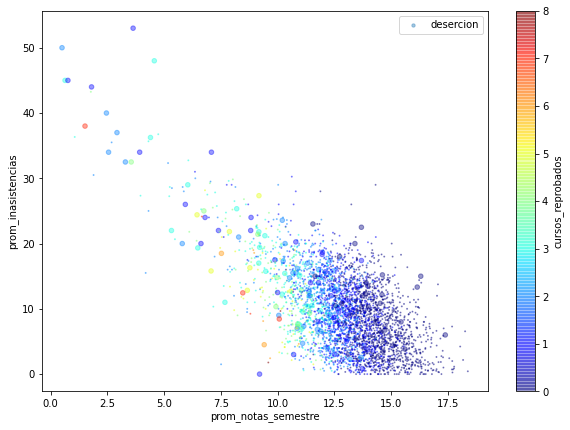

In [ ]:
strat_train_set.plot(kind="scatter", x="prom_notas_semestre", y="prom_inasistencias", alpha=0.4,
    s=strat_train_set["desercion"]*20+1, label="desercion", figsize=(10,7),
    c="cursos_reprobados", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

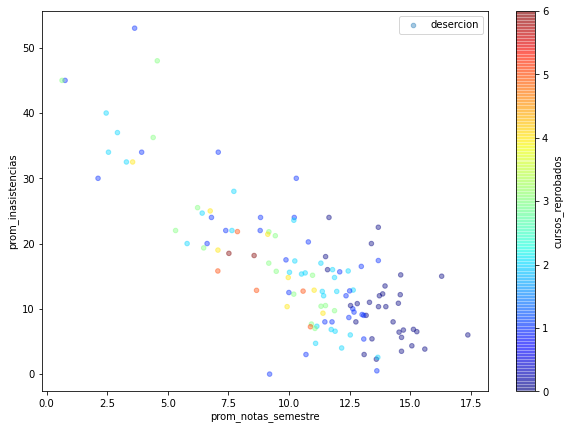

In [ ]:
tmp_set = data[data['cant_semestres']!=0]
tmp_set.plot(kind="scatter", x="prom_notas_semestre", y="prom_inasistencias", alpha=0.4,
    s=tmp_set["desercion"]*20+1, label="desercion", figsize=(10,7),
    c="cursos_reprobados", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [ ]:
#PREPARE DATA FOR MACHINE LEARNING ALGORITMS
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names = False): # no *args or **kargs
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        return np.c_[X]

num_attribs = list(data)
num_attribs.remove('sexo')
num_attribs.remove('desercion')
my_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('attribs_adder', AttributesAdder()),
    ('std_scaler', StandardScaler()),
  ])
X = my_pipeline.fit_transform(strat_train_set)
Y = strat_train_set['desercion']
print(X)



[[-0.14605185 -0.21795033  0.05819902 -0.93824446]
 [-0.14605185  0.33136655  0.58941473 -0.15163988]
 [-0.14605185 -0.86826315 -0.17530244  0.6349647 ]
 ...
 [-0.14605185  0.31553113 -1.52961059  0.6349647 ]
 [-0.14605185  0.77311916 -0.35042845 -0.93824446]
 [-0.14605185  0.5678436  -1.27665072 -0.93824446]]


In [ ]:
def prediccion(theta, datos):
  return 1 / (1 + np.exp(-1 * np.dot(datos, theta)))
#error cuadratico medio
def RMSE(x, y, theta):
  n = len(y)
  error = np.subtract(prediccion(theta, x), y)
  error = np.multiply(error, error)
  return np.sqrt(np.sum(error)/n)
#J(theta)
def costo(x, y, theta):
  m = len(y)
  costo = y*np.log(prediccion(theta,x))+ (1-y)* np.log(1-prediccion(theta,x))
  #print(prediccion(theta,x))
  costo = (-1/m)*np.sum(costo)
  return costo
#regresion logistica
def aprendizaje(x, y, alfa, epochs):
  x = np.concatenate((np.ones([len(x), 1]), x), axis = 1)
  n_features = x.shape[1]
  theta = np.zeros(n_features)
  m = len(y)
  #print("epoca: 0 theta:",theta," costo:", costo(x, y, theta))
  for e in range(epochs):
    for i in range(len(theta)):
      theta[i] = (theta[i] - alfa * np.sum(np.multiply(np.subtract(prediccion(theta, x), y), x[:,i])))
    #print("epoca: ", e+1,"theta:",theta," costo:", costo(x, y, theta))
  return theta
class miRegresionLogistica(BaseEstimator, ClassifierMixin):
    def fit(self, X, Y):
        self.theta = aprendizaje(X, Y, 0.01, 100)
        return self  # nothing else to do
    def predict(self, X, y=None):
        pred = prediccion(self.theta, np.concatenate((np.ones([len(X), 1]), X), axis = 1))
        preddf = pd.DataFrame(data=pred)
        preddf[preddf[0]>=0.5]=1
        preddf[preddf[0]<0.5]=0
        return preddf
print("len y", len(Y))
theta = aprendizaje(X, Y, 0.01, 100)

len y 3600


tn:  3456
tp:  101
fn:  43
fp:  0
recall:  0.7013888888888888
fbeta_score2:  0.7459379615952731
fbeta_score1:  0.8244897959183674
loss log:  0.41254649582810077


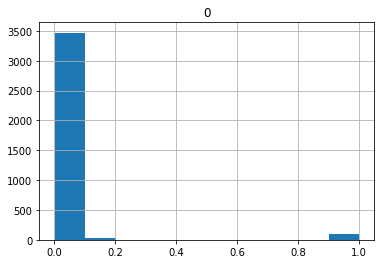

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import fbeta_score, make_scorer

pred = prediccion(theta, np.concatenate((np.ones([len(X), 1]), X), axis = 1))
preddf = pd.DataFrame(data=pred)
preddf.hist()
preddf[preddf[0]>=0.5]=1
preddf[preddf[0]<0.5]=0
cm = confusion_matrix(Y, preddf)
tn, fp, fn, tp = cm.ravel()
#tp / (tp + fn) <- recall
#f2 = fbeta_score(y_true, y_pred_class, beta = 2)
#loss = log_loss(y_true, y_pred)
print("tn: ",tn)
print("tp: ",tp)
print("fn: ",fn)
print("fp: ",fp)
print("recall: ", tp / (tp + fn))
print("fbeta_score2: ", fbeta_score(Y, preddf, beta = 2))
print("fbeta_score1: ", fbeta_score(Y, preddf, beta = 1))
print("loss log: ", log_loss(Y, preddf))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

reglog = miRegresionLogistica()
clf1 = SGDClassifier(loss="log", penalty="l2", max_iter=100)
clf2 = DecisionTreeClassifier(max_depth=5, random_state=0)
clf3 = GaussianNB()


ftwo_scorer = make_scorer(fbeta_score, beta=2)

print(cross_val_score(reglog, X, Y, cv=5, scoring = ftwo_scorer))
print(cross_val_score(clf1, X, Y, cv=5, scoring = ftwo_scorer))
print(cross_val_score(clf2, X, Y, cv=5, scoring = ftwo_scorer))
print(cross_val_score(clf3, X, Y, cv=5, scoring = ftwo_scorer))


[0.78947368 0.73529412 0.7037037  0.69852941 0.76642336]
[0.75757576 0.73529412 0.7037037  0.7037037  0.75      ]
[0.78947368 0.73529412 0.69343066 0.6884058  0.76086957]
[0.80882353 0.72992701 0.73529412 0.69343066 0.76086957]
